In [13]:
import pandas as pd
import numpy as np
import seaborn as sns



In [5]:
df=pd.read_csv("hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv",low_memory=False)
print(df.columns)

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')


# Calculate summary statistics for numeric columns

In [6]:
numeric_columns = ['Length of Stay', 'Birth Weight', 'Total Charges', 'Total Costs']
print("Summary statistics for numeric columns:")
print(df[numeric_columns].describe())

Summary statistics for numeric columns:
       Birth Weight  Total Charges   Total Costs
count  2.622133e+06   2.622133e+06  2.622133e+06
mean   3.103701e+02   2.945920e+04  1.186523e+04
std    9.769686e+02   5.640021e+04  2.727029e+04
min    0.000000e+00   1.000000e-02  0.000000e+00
25%    0.000000e+00   7.900000e+03  3.290510e+03
50%    0.000000e+00   1.567373e+04  6.175350e+03
75%    0.000000e+00   3.172352e+04  1.222803e+04
max    9.900000e+03   1.206004e+07  1.470885e+07


# Data Visualization

### Histograms for numeric variables

In [7]:
for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

NameError: name 'plt' is not defined

# Bar charts for categorical variables

In [ ]:
categorical_columns = ['Health Service Area', 'Age Group', 'Gender', 'Race', 'Ethnicity']
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)
    plt.show()

# Outlier Detection

## Box plots for 'Total Charges' and 'Total Costs'

In [ ]:
plt.figure()
sns.boxplot(data=df, y='Total Charges')
plt.title('Box Plot for Total Charges')
plt.show()

In [ ]:
plt.figure()
sns.boxplot(data=df, y='Total Costs')
plt.title('Box Plot for Total Costs')
plt.show()

# Correlation Analysis

In [ ]:
correlation_matrix = df[numeric_columns].corr()

## Create a heatmap to visualize correlations

In [ ]:
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Distribution Analysis
 ## Check normality of 'Total Charges' using a Q-Q plot

In [ ]:
from scipy import stats
import pylab

In [ ]:
plt.figure()
stats.probplot(df['Total Charges'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Total Charges')
plt.show()

# Missing Data
## We can use seaborn to create a simple heatmap to see where we are missing data!

In [8]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [11]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype
---  ------                               -----
 0   index                                bool 
 1   Health Service Area                  bool 
 2   Hospital County                      bool 
 3   Operating Certificate Number         bool 
 4   Facility ID                          bool 
 5   Facility Name                        bool 
 6   Age Group                            bool 
 7   Zip Code - 3 digits                  bool 
 8   Gender                               bool 
 9   Race                                 bool 
 10  Ethnicity                            bool 
 11  Length of Stay                       bool 
 12  Type of Admission                    bool 
 13  Patient Disposition                  bool 
 14  Discharge Year                       bool 
 15  CCS Diagnosis Code                   bool 
 16  CCS Diagnosis Desc

## This heatmap visualizes the presence of missing (null) values in the DataFrame.This visualization helps quickly identify patterns of missing data in the dataset, which can be valuable for data cleaning and preprocessing tasks, as well as for understanding the extent and distribution of missing values across different columns and rows.

<Axes: >

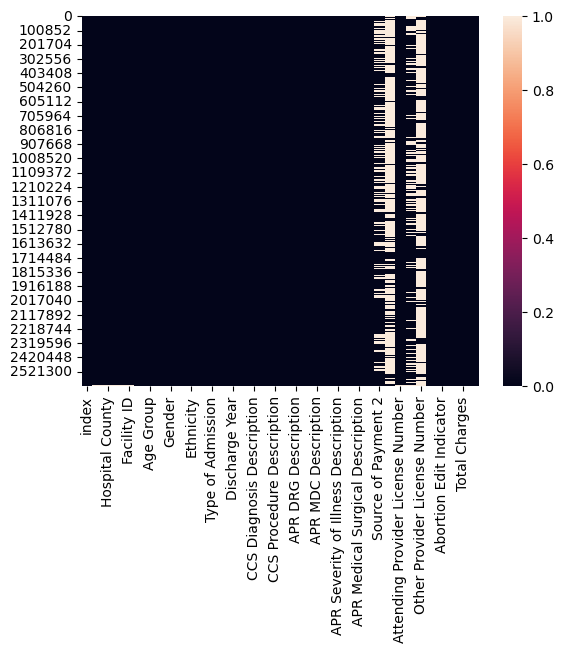

In [15]:
sns.heatmap(df.isnull())

/Users/shyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/shyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/shyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:160

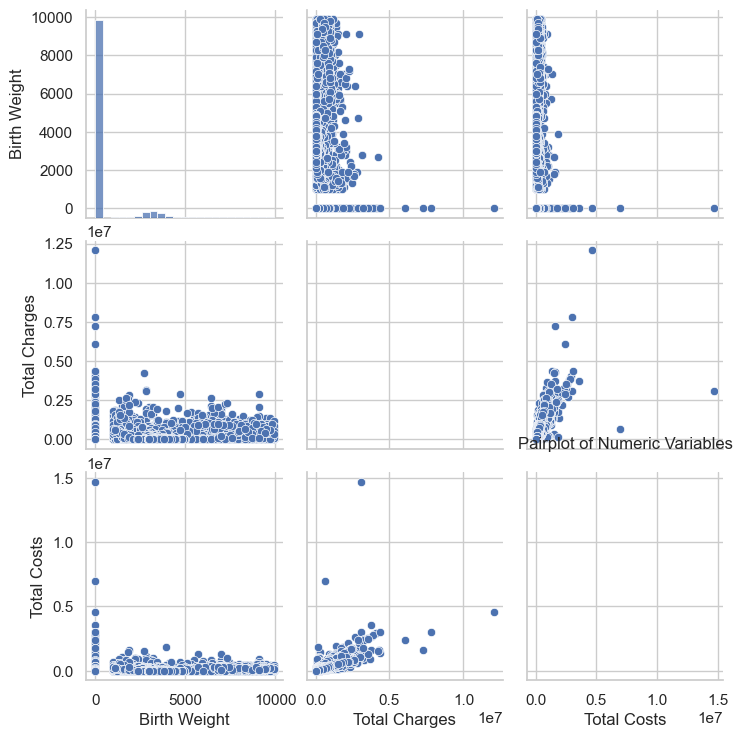

In [23]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

palette = "Set2"
sns.pairplot(df[['Length of Stay', 'Birth Weight', 'Total Charges', 'Total Costs']], palette=palette)
plt.title('Pairplot of Numeric Variables')
plt.show()

# Data Cleaning 
## Handle missing data (example: fill missing values in 'Age Group' with the mode)

In [ ]:
df['Age Group'].fillna(df['Zip Code - 3 digits'].mode()[0], inplace=True)


 ## Remove duplicates (example: remove duplicate rows)

In [ ]:
df.drop_duplicates(inplace=True)